# Import relevant packages

In [ ]:
!pip install contractions

In [ ]:
#for reading data
import pandas as pd

#for numerical computaions
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for text preprocessing and cleaning
import re #data cleaning and remove unwanted characters
import nltk #to remove stopwords, implement lematization and tokenization
import string #to clean data
import contractions #to clean texts



#to display wordcloud
from wordcloud import WordCloud, STOPWORDS

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to show max width
pd.set_option('max_colwidth', None)

# Helps to display the images
from PIL import Image #pillow library

#to implement sparse vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#for spliting data into test, validation and train
from sklearn.model_selection import train_test_split

#for decision tree and ensemble modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

#for metrics evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #for adding layers
from tensorflow.keras.layers import Input, Dropout, TextVectorization, Dense, SimpleRNN, LSTM, Embedding, SpatialDropout1D, GRU #for different layers


from tensorflow.keras.optimizers import Adam, SGD #import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #to save best performing model and help prevent overfiting
from tensorflow.keras.utils import to_categorical #to categorize each class of the target
from tensorflow.keras.preprocessing.text import Tokenizer #to tokenize the texts
from tensorflow.keras.preprocessing.sequence import pad_sequences #to enforce uniform length of data



## Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/EssayClassificationProject")

In [ ]:
os.listdir()

['Training_Essay_Data.csv',
 'utility.py',
 '__pycache__',
 'uncleaned_essay_data.csv',
 'cleaned_essay_data.csv',
 'positive-unigram.png',
 'cache_dir',
 'outputs',
 'runs',
 'spam_email_detector',
 'essay_classification_project',
 'Mistral 7B',
 'Mistral_7B_Tokenizer']

In [ ]:
from utility import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Read the data

In [ ]:
def read_file(path):
  """
  returns a dataframe of data in a csv format
  """
  #read the csv file from path
  df = pd.read_csv(path)
  return df

In [ ]:
#define data path
path = "Training_Essay_Data.csv"
#read the file
df = read_file(path)
#dispay top5 rows
df.head(2)

,text,generated
0,"Car-free cities have become a subject of increasing interest and debate in recent years, as urban areas around the world grapple with the challenges of congestion, pollution, and limited resources. The concept of a car-free city involves creating urban environments where private automobiles are either significantly restricted or completely banned, with a focus on alternative transportation methods and sustainable urban planning. This essay explores the benefits, challenges, and potential solutions associated with the idea of car-free cities. Benefits of Car-Free Cities Environmental Sustainability: Car-free cities promote environmental sustainability by reducing air pollution and greenhouse gas emissions. Fewer cars on the road mean cleaner air and a significant decrease in the contribution to global warming. Improved Public Health: A reduction in automobile usage can lead to better public health outcomes. Fewer cars on the road result in fewer accidents and a safer urban environment for pedestrians and cyclists. Moreover, less air pollution can lead to reduced respiratory and cardiovascular problems. Efficient Use of Space: Car-free cities utilize urban space more efficiently. Parking lots and wide roads can be repurposed for green spaces, parks, and pedestrian zones, enhancing the overall quality of life in the city. Reduced Traffic Congestion: By eliminating or restricting car usage, traffic congestion is significantly reduced, leading to faster commute times and less frustration for residents and commuters. Cost Savings: Car ownership and maintenance can be expensive. Car-free cities allow residents to save money on vehicles, fuel, and insurance, improving their overall financial well-being. Challenges of Car-Free Cities Resistance to Change: Transitioning to a car-free city can face resistance from citizens, especially those who rely heavily on their cars for daily activities and commutes. Public Transportation Infrastructure: An effective public transportation system is crucial for the success of car-free cities. Cities need to invest in and expand their public transportation networks to ensure that people have viable alternatives to cars. Economic Impact: Businesses that rely on car-dependent customers may experience a decline in revenue in a car-free city. It's essential to address this economic impact and find ways to support affected businesses during the transition. Urban Planning and Infrastructure: The redesign of urban areas for car-free living requires significant planning and investment in infrastructure, which can be a lengthy and complex process. Solutions for Car-Free Cities Expand Public Transportation: Invest in the expansion and improvement of public transportation systems to provide convenient and affordable alternatives to private cars. Promote Active Transportation: Encourage walking and cycling by building bike lanes, pedestrian-friendly streets, and ensuring safe infrastructure for these activities. Implement Carpooling and Ride-Sharing: Promote carpooling and ride-sharing services to reduce the number of private vehicles on the road. Adopt Electric and Sustainable Transportation: Encourage the use of electric vehicles and promote sustainability by using renewable energy sources to power transportation. Education and Public Awareness: Educate citizens about the benefits of a car-free city and involve them in the planning process to increase support and understanding. Conclusion Car-free cities represent a vision for a sustainable and healthier urban future. While the transition to a car-free city is not without challenges, the potential benefits in terms of environmental sustainability, public health, and efficient urban living make it a compelling goal. Through a combination of investment in public transportation, promotion of alternative transportation methods, and public engagement, cities can work towards a future where cars are no longer the dominant mode of transportation. Ca

- About the data:
- text : Which contains essay text
- generated : This is target label . 0 - Human Written Essay , 1 - AI Generated Essay

In [ ]:
df.sample(4)

,text,generated
18476,"Students should be allow to bring cell phones to because maybe some students may have an emergency and they need to call there parents ,or if there parents had an emergency ,or a car accidents an need to call her child to make sure they aren't picking them up after school. And maybe they need there cell phones if they walk to school and they kidnapped them and they need to call someone to help them.thats why the principal should allow the students to bring cell phones to school and turned them off in call.\r\n\r\nThey can use there cell phones in lunch time only but to make sure they have them off in class .And in the hall way they can use them just for a emergency or if a kid faints someone can call the nurse to come for him that.student shou",0
853,"As our atmosphere constantly changes, so do our habits. With greenhouse emissions rising, our efforts towards changing it are too. Even outside of the United States there are efforts being made in Germany, France, and Colombia. In Gernamy, some people have ended up selling their cars, and started living a whole new lifestyle. Moved into carless communities with others, and now live supposedly happier lives. A city in Columbia, officially has a car free day, to try and cut down on emissions and help reduce the stress of driving, also those who do not go along with it are fined. So, maybe life with less cars can actually be beneficial to many of us.\n\nIn the city of Vauban, Germany there is a suburb that was finished around 2006. Its goal was to limit the use of cars. So far it seems successful in its purpose where 70% of the families living there do not have cars, and at least 57% sold a car to live in that suburb. For the most part, there is no driveways, garages, or street parking so it is mainly carfree except for the ""main thoroughfare"" being the tram to downtown. Proof that not only the idea was beneficial, but it was also ""inspirational"" is that places like Vauban, are growing more and more in Europe, and the U.S. has the EPA environmental Protection Agency promoting these car reduced communities, and legislators are now starting to act upon it. It is also becoming a part of a movement called ""smart planning"". The idea also is to make cities denser so more people can live, and easier for walking. To make things closer, so getting there is not such a hassle especially if you don't have a car.\n\nAfter nearrecord pollution in Paris, the city enforced a partial ban on car use to help clear the city's air. On Monday, morotorists with an even numbered plate were told to leave their car come, or be fined. and on that Tuesday, people with odd numbered plates would have to do the same. Because of that, nearly 4,000 people were fined. And 27 people had their cars impounded due to the way they acted upon being fined. Though it left some unhappy people, it did help the congestion was down by 30% in the city.\n\nThe City of Bogota, Colombia has started a carfree day. And apparently it's a big hit. Its goal is to promote alternate transportation, and reduce smog, with the exception of buses and taxis. That day, millions of Colombians either walked, hiked, biked, or skated. And even though there was some gray clouds with a bit of rain, it didn't stop many people. It is also seen as an opportunity to help lower stress and air pollution. And to show its popularity, two other cities in the county Cali and Velledupar have joined in on the event. Even the mayor of Asuncion, Paraguay came to the county to say how great of an idea it was. More parks, sports centers have been buit, and 118 miles of bike paths have been created. On top of that, new sidewalks have been built to help people in general.\n\nWith all of the effort that so many countries have put out towards making a better environment for themselves, I hope you would be able to see why they did it, because I do. When it comes to making communities with car restrictions, or a day or two when use in limited 

# EDA

In [ ]:
df.duplicated().sum()

1805

- There are 1,805 duplicated rows in the data.

In [ ]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

#reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(27340, 2)

- After removing the duplicated rows, we are left with 27,340 rows.

In [ ]:
df['generated'].value_counts(normalize=True)

generated
0    0.589685
1    0.410315
Name: proportion, dtype: float64

- The dataset has an approximately 59:41 imbalance proportion of human generated essays to ai-generated essays.

In [ ]:
df.isnull().sum()

text         0
generated    0
dtype: int64

- There are no missing values in the data.

In [ ]:
df['generated'].unique()

array([1, 0])

In [ ]:
df[df['generated']==1]['text'].sample(2)

22119                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      There are many great ways to travel, but a group-led tour is the best way to do it. A group of people who are

In [ ]:
df[df['generated']==0]['text'].sample(2)

9790     My name is Proffesor Yado, and my colleague and I were discussing on the infamous "Face on Mars". My colleague believes in superstition and conspiracies so he stated that the face on Mars must be of extraterrestrial origin. I said that was porposterous, but my colleague continued to try and convince me to no availe. I told my colleague there are many reasons why the some scientists and people thought the "Face on Mars" looked like a face. I then procedded to tell him my reasons.\n\nFirst off, cameras at the time were not as advanced as they are today. The cameras of the day would "distort the image and it would only capture the major features of the butte or mesa. The most recent image taken of the "Face on Mars" in 2001 looks very different from the original image taken in 1976. If there was a actual structure left by aliens, modern cameras would be able to see it. The the more modern cameras of today are able to see the more defining features of a object.\n\nSecondly humans 

# Save the uncleaned data

In [ ]:
df.to_csv('uncleaned_essay_data.csv', index=False)

# Text cleaning
- We will apply the following preprocessing to the data:
  - Remove punctautions
  - Remove stopwords
  - lowercasing
  - Remove of unwanted characters, trailing or leading whitespaces

In [ ]:
def apply_cleaner(data, feature):
    """
    this function applies all the necessary preprocessing steps to the data,
    args:
      data: dataframe
      feature: feature in the data to be cleaned
    returns:
      a cleaned data with preprocessing steps applied
    """
    data[feature] = data[feature].apply(str.lower) #lowercase the texts
    print("Text completely lowercased")
    data[feature] = data[feature].apply(remove_punctuation)#remove punctuations
    print("Punctuations completely lowercased")
    data[feature] = data[feature].apply(text_cleaner)#remove any other unwanted characters and  #whitespaces
    print("Unwanted characters, trailing or leading whitespaces removed")
    data[feature] = data[feature].apply(stopword_remover)
    print("stopwords removed")
    return data

In [ ]:
df = apply_cleaner(df, 'text')

df.sample(3)

Text completely lowercased
Punctuations completely lowercased
Unwanted characters, trailing or leading whitespaces removed
stopwords removed


,text,generated
8069,author describe see emotions image monalisa many peaple think monalisa happy smile fews emotions moment leonardo da vinci try speak image emotions mirror author speak article lonardo da vinci probably knows study emotion person think see emotios peaple face mirror look feeling moment tired sick sad happy disgusted sometimes see emotions monalisa looks happy feel others emotions see maybe conclusion see emotions face emotions happen expressions classmate look serious exam others look tired maybe others emotions know,0
1101,fellow citizens must tell spectacular things cities started giving cars decrease congestion pollution rate cities already tried seen huge benefit little community vauban germany fist city let go cars residents say feel much less stress cars surprise worry traffic would reduce stress also drastically reduced tailpipe emissions rearangments stores relocated along public sidewalks people longer hae drive across town mall stores simply walk bike road pick whatever might interest next place picked amazing wonderful idea none busiest city france paris paris ordered citizens leave car home comply would pay euro fine drivers fined people cars impounded reaction fine able buy car drive would among would car impounded bright side congestion went amazing one busiest cities world next place thats wanting pick car trend none right united states supporting year goes recent studies suggest americans buying many cars driving less getting fewer licenses pattern progresses could solve atmosphere problem huge cities like paris vauban united states give cars alone could drastically change path planet headed citizens hope encourages cut back car usage take bike every walk whats worst could happen limited automobile usage,0
7724,reading emotional expresssions students classroom valuable would nice give students privacy maybe actually focus better reason think bad look students emotions giving privacy let want give math test pass math test knowing technologies watching emotions going nervous lot students good test test scrore decrease parents concerns abot kids passing class principals trouble technology help see emotion certain test assissments good maybe teachers consulors couuld help better things,0


## Display Top words associated with Human and AI-generated essays

In [ ]:
#make a copy of the data
df1 = df.copy()

#rename the genertaed column in the copy of the data
df1.rename({'generated': 'Labels', 'text': 'Text'})
df1.columns = ['Text', 'Labels']


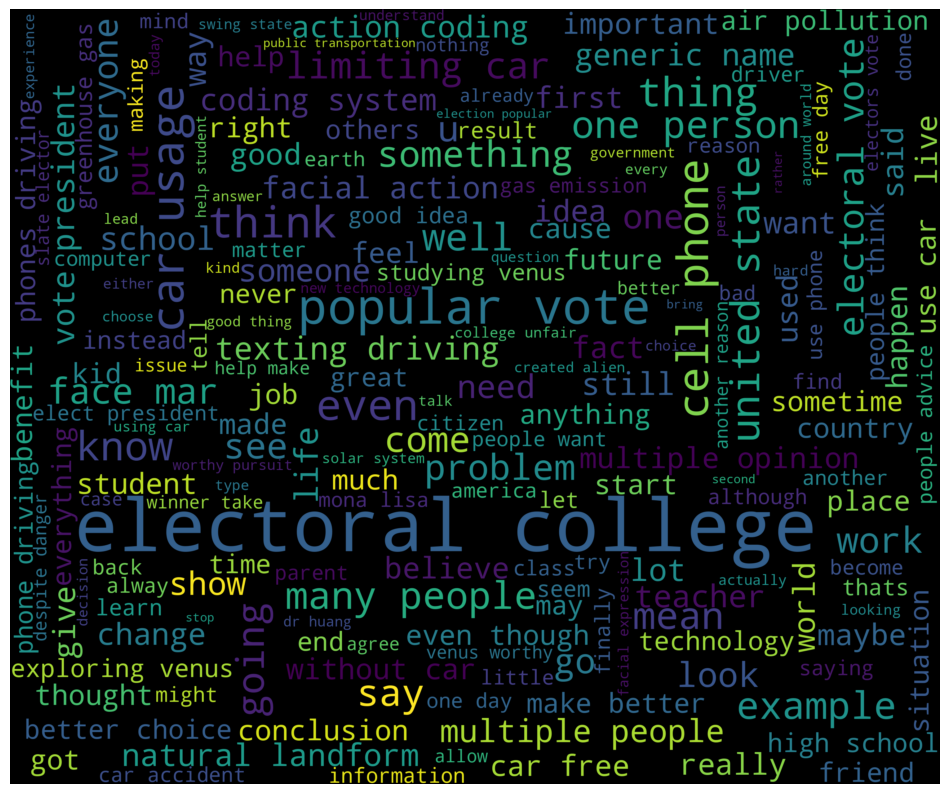

In [ ]:
WordCloudGen(df1, 0)

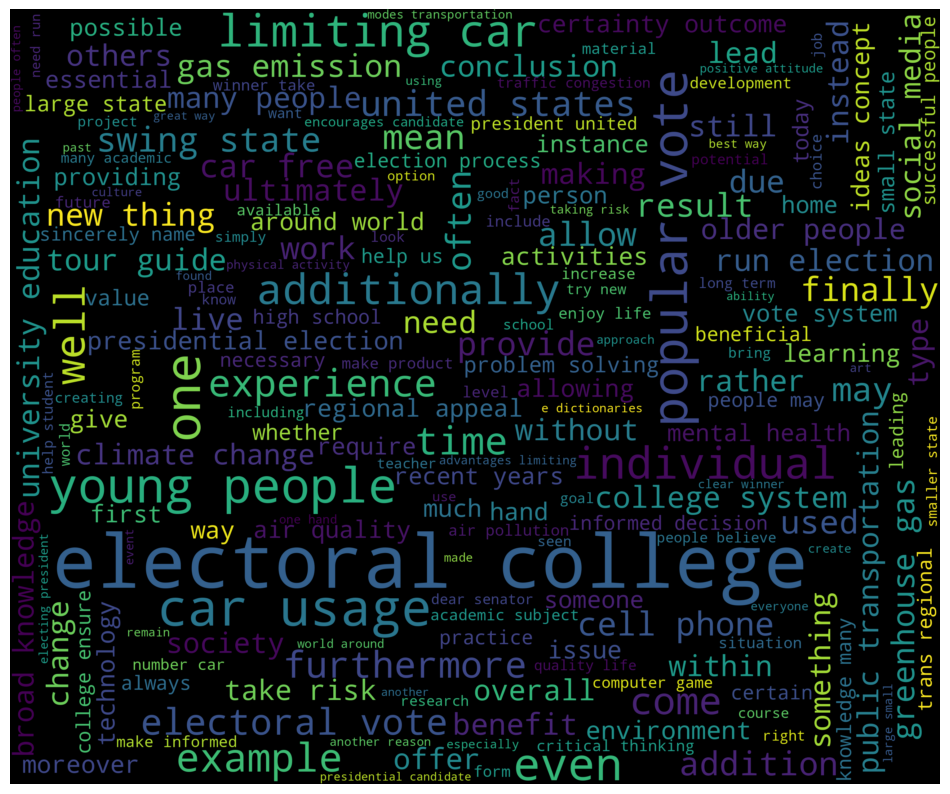

In [ ]:
WordCloudGen(df1, 1)

## Save the cleaned data

In [ ]:
# df.to_csv('cleaned_essay_data.csv', index=False)

# Load the cleaned data

In [ ]:
!pwd

/content/drive/MyDrive/EssayClassificationProject


In [ ]:
data = read_file('cleaned_essay_data.csv')
data.head(1)

,text,generated
0,car free cities become subject increasing interest debate recent years urban areas around world grapple challenges congestion pollution limited resources concept car free city involves creating urban environments private automobiles either significantly restricted completely banned focus alternative transportation methods sustainable urban planning essay explores benefits challenges potential solutions associated idea car free cities benefits car free cities environmental sustainability car free cities promote environmental sustainability reducing air pollution greenhouse gas emissions fewer cars road mean cleaner air significant decrease contribution global warming improved public health reduction automobile usage lead better public health outcomes fewer cars road result fewer accidents safer urban environment pedestrians cyclists moreover less air pollution lead reduced respiratory cardiovascular problems efficient use space car free cities utilize urban space efficiently parking lots wide roads repurposed green spaces parks pedestrian zones enhancing overall quality life city reduced traffic congestion eliminating restricting car usage traffic congestion significantly reduced leading faster commute times less frustration residents commuters cost savings car ownership maintenance expensive car free cities allow residents save money vehicles fuel insurance improving overall financial well challenges car free cities resistance change transitioning car free city face resistance citizens especially rely heavily cars daily activities commutes public transportation infrastructure effective public transportation system crucial success car free cities cities need invest expand public transportation networks ensure people viable alternatives cars economic impact businesses rely car dependent customers may experience decline revenue car free city essential address economic impact find ways support affected businesses transition urban planning infrastructure redesign urban areas car free living requires significant planning investment infrastructure lengthy complex process solutions car free cities expand public transportation invest expansion improvement public transportation systems provide convenient affordable alternatives private cars promote active transportation encourage walking cycling building bike lanes pedestrian friendly streets ensuring safe infrastructure activities implement carpooling ride sharing promote carpooling ride sharing services reduce number private vehicles road adopt electric sustainable transportation encourage use electric vehicles promote sustainability using renewable energy sources power transportation education public awareness educate citizens benefits car free city involve planning process increase support understanding conclusion car free cities represent vision sustainable healthier urban future transition car free city without challenges potential benefits terms environmental sustainability public health efficient urban living make compelling goal combination investment public transportation promotion alternative transportation methods public engagement cities work towards future cars longer dominant mode transportation car free cities offer promising vision sustainable vibrant urban environment,1


In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
#get subsets of the dataframe for each category
ai_df = data[data['generated']==1]
human_df = data[data['generated']==0]

ai_df_list = [i for i in ai_df['text']]
human_df_list = [i for i in human_df['text']]

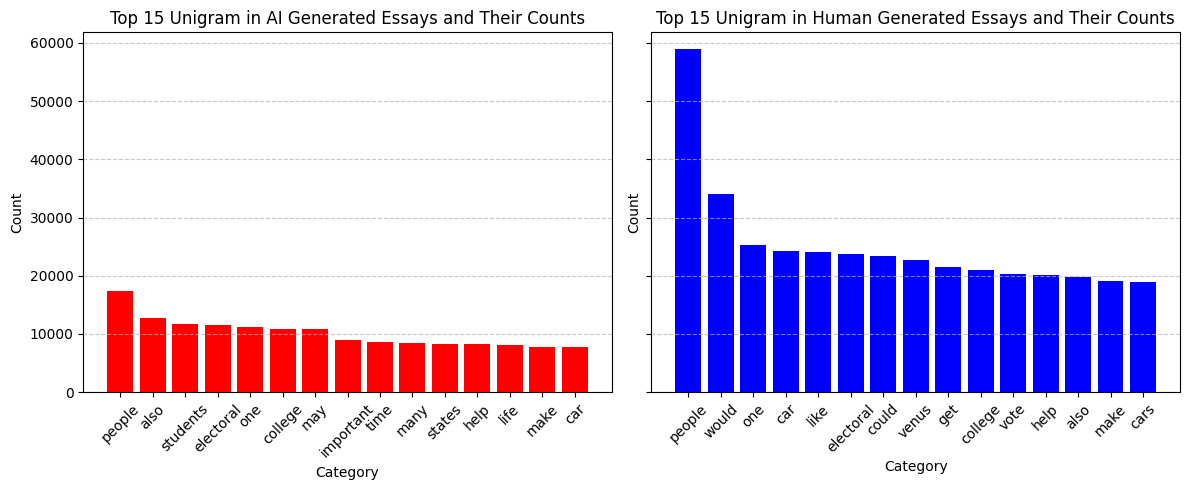

In [ ]:
#for AI generated essay type, create a list that contains tokens for each essay in that category
ai_df_list = []
for essay in ai_df['text']:
  ai_df_list.extend(essay.split())

#create a dataframe with the list
cust_df = pd.DataFrame(data=ai_df_list, columns=['tokens'])
top_tokens_ai = cust_df['tokens'].value_counts()
top_10_tokens_ai = top_tokens_ai.head(15) #get the top 10 tokens

#for human generated essay type, create a list that contains tokens for each essay in that category
human_df_list = []
for essay in human_df['text']:
  human_df_list.extend(essay.split())

cust_df = pd.DataFrame(data=human_df_list, columns=['tokens'])
top_tokens_human = cust_df['tokens'].value_counts()
top_10_tokens_human = top_tokens_human.head(15)


#create a figure for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for Human Generated Essays
axs[1].bar(top_10_tokens_human.index, top_10_tokens_human, color='blue')
axs[1].set_title('Top 15 Unigram in Human Generated Essays and Their Counts')  # Set the title
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)



# Plot for AI Generated Essays
axs[0].bar(top_10_tokens_ai.index, top_10_tokens_ai, color='red')
axs[0].set_title('Top 15 Unigram in AI Generated Essays and Their Counts')  # Set the title
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)


# Display plot
plt.tight_layout()
plt.show()


- The charts for unigram Analysis indicates that the unigrams for Human generated essays have higher counts.

## Exploring top Trigrams in each essay category


In [ ]:
import nltk
from nltk import ngrams

In [ ]:
def generate_ngrams(text, ngram=3):
  """
  this function generates ngrams from text
  """
  #split the words into a list
  words = [word for word in text.split()]
  #obtain the ngrams for the words
  temp = zip(*[words[i:] for i in range(0, ngram)])
  ans = [' '.join(i) for i in temp]
  return ans

In [ ]:
from collections import defaultdict

ai_values=defaultdict(int)
human_values=defaultdict(int)

#get the count of every word in the text column  where generated = 0
for text in human_df.text:
  for word in generate_ngrams(text):
    human_values[word]+=1

for text in ai_df.text:
  for word in generate_ngrams(text):
    ai_values[word]+=1

In [ ]:
#create a dataframe for each categories  using the items in each dictionary
df_human=pd.DataFrame(sorted(human_values.items(),key=lambda x:x[1],reverse=True))
df_ai=pd.DataFrame(sorted(ai_values.items(),key=lambda x:x[1],reverse=True))

In [ ]:
#get the top 10 trigrams and their count in human essays
human_trigram=df_human[0][:10]
human_count=df_human[1][:10]

#get the top 10 trigrams and their count in AI essays
ai_trigram=df_ai[0][:10]
ai_count=df_ai[1][:10]

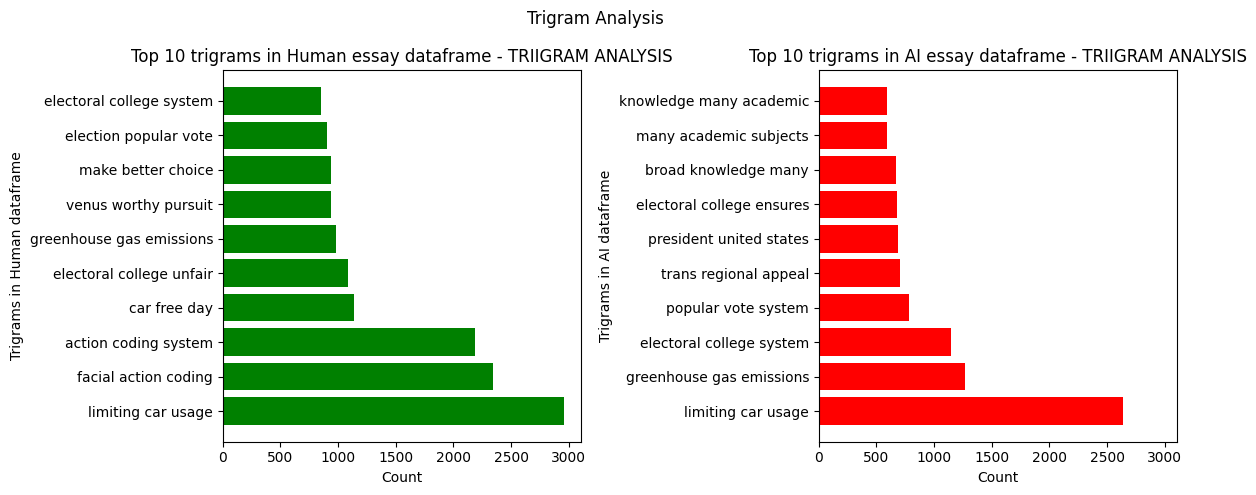

In [ ]:
#create a figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

#create a suptitle
plt.suptitle('Trigram Analysis')

#plot a horizontal barplot for human trigrams
axs[0].barh(human_trigram, human_count, color='green')
axs[0].set_xlabel("Count")  # label x axis
axs[0].set_ylabel("Trigrams in Human dataframe")  # label y-axis
axs[0].set_title("Top 10 trigrams in Human essay dataframe - TRIIGRAM ANALYSIS")  # set title
axs[0].tick_params(axis='y', rotation=0)  # rotate the y ticks

#plot a horizontal barplot for AI trigrams
axs[1].barh(ai_trigram, ai_count, color='red')
axs[1].set_xlabel("Count")  # set xlabel
axs[1].set_ylabel("Trigrams in AI dataframe")  # set ylabel
axs[1].set_title("Top 10 trigrams in AI essay dataframe - TRIIGRAM ANALYSIS")  # set the title
axs[1].tick_params(axis='y', rotation=0)  # rotate y ticks

plt.tight_layout()  # adjust layout
plt.show()  # display the plot


- Similar Trigrams such as : 'limiting car usgae', 'greenhouse gas emissions' are present in both email types.


In [ ]:
data.shape

(27339, 2)

In [ ]:
df = data.copy()

# Vectorization
- I will obtain 2 sparse vector represnetation of the data namely: Bag-of-words vectors and TF-IDF Vectors.
- I will also obtain 2 Dense vector represenation of the data: Continuous-Bag-of-words and Skipgram embeddings.

- These would be used as features during modeling and the performance of each models with the features will be noted.

# Sparse Features
### Bag of Words and TF-IDF  vectors

In [ ]:
# vectorize the reviews
def sparse_vectorizer(data, feat, Bow_c=True, TFIDF_c=True, max_features=1000):
    """
    returns bow and tfidt vectors of the texts
    if tfidf=False, only bow vectors will be returned with max_feat
    df : dataframe
    column: specified comment column name
    """
    BOW = CountVectorizer(max_features=max_features)
    bow_vecs = BOW.fit_transform(data[feat]).toarray()

    TF = TfidfVectorizer(max_features=max_features)
    tf_vecs = TF.fit_transform(data[feat]).toarray()

    if Bow_c == True and TFIDF_c != True:
        return bow_vecs

    elif Bow_c == True and TFIDF_c == True:
        return bow_vecs, tf_vecs

In [ ]:
df.isnull().sum()

text         0
generated    0
dtype: int64

In [ ]:
df.columns

Index(['text', 'generated'], dtype='object')

In [ ]:
#check if any row is an empty string
df['text'].eq('').sum()

0

In [ ]:
 bow_vecs, tf_vecs = sparse_vectorizer(df, 'text')

In [ ]:
bow_vecs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tf_vecs

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04044721, 0.        , ..., 0.        , 0.06231434,
        0.03821433],
       [0.        , 0.04058886, 0.        , ..., 0.        , 0.        ,
        0.03834817]])

## Dense vectors
#### Continuous Bag of words

In [ ]:
def obtain_word_embeddings(model, token_list):
    """
    this function returns an array of word-embedding vectors for each token found in the list of tokens
    model: model
    token_list: each itirative sentence in a list

    """
    embedding_list = []
    vocabulary = set(model.wv.key_to_index) #get vocabulary

    for token in token_list: #for each  word in token_list
        if token in vocabulary: #if the token (word) is found in the vocab
            embedding_list.append(model.wv.get_vector(token))#append the word embeddings to the list

    if len(embedding_list) == 0: #if length of embdding is zero
        return np.zeros(model.vector_size) #retrun matrices of zeros with specifed dimension
    else:
        return(np.mean(embedding_list, axis=0)) #return the mean of word embeddings for each word

def avg_word_embedding(model, sentence_list):
    """
    this function applies the get_word_embeddings on each sentence
    model: model
    sentence_list: list containing a list of tokens
    """

    for token_list in sentence_list:

        word_emb = [obtain_word_embeddings(model, token_list) for token_list in sentence_list]
        #this will put every averaged word embedding for each sentence in a list hence we are able to retain the
        #shape of the array

        return np.array(word_emb)

In [ ]:
#step1: import relevant packages
from gensim.models import Word2Vec

#step2: append all essays in a list
essay_list = []
for essay in df['text']:
    tokens = essay.split()
    essay_list.append(tokens)

#step3: define the word2vec model of 300-Dimension
essay_w2v_model = Word2Vec(sentences=essay_list, min_count=5, vector_size=300)

In [ ]:
#save the word2vec model
essay_w2v_model.save("/w2v_model.model")

In [ ]:
#step4: get the word embeddings
w2v_embeddings = avg_word_embedding(model=essay_w2v_model, sentence_list=essay_list)
#view the word embeddings
pd.DataFrame(w2v_embeddings)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.024665,0.346305,-0.271795,-0.134928,0.552807,0.245854,-0.619838,-0.405524,0.057897,-0.292254,...,-0.081013,-0.144447,-0.572407,0.095799,0.202452,-0.035103,-0.303594,0.370057,-0.031298,-0.126453
1,-0.013398,0.363187,-0.277846,-0.136834,0.489248,0.179268,-0.556849,-0.410894,0.038138,-0.257676,...,-0.115018,-0.078236,-0.519794,0.071236,0.216677,0.029099,-0.270423,0.399829,-0.016691,-0.116502
2,-0.048113,0.379756,-0.275416,-0.108376,0.521874,0.169506,-0.556118,-0.423721,0.050475,-0.264031,...,-0.191123,-0.014547,-0.503865,0.047307,0.242427,0.014884,-0.264586,0.402678,-0.012238,-0.096485
3,-0.043285,0.302111,-0.290311,-0.162553,0.492493,0.151428,-0.515800,-0.399238,0.057514,-0.224216,...,-0.170331,-0.049850,-0.487616,0.040602,0.255972,0.018317,-0.277796,0.394074,-0.026341,-0.089742
4,-0.016454,0.343497,-0.237645,-0.145664,0.522195,0.163096,-0.532810,-0.394199,0.055071,-0.243024,...,-0.193475,-0.072410,-0.510163,0.048703,0.270178,0.012327,-0.300755,0.393921,-0.001864,-0.066005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27334,-0.024573,-0.394803,-0.002581,0.073208,0.239181,0.114914,-0.009254,0.096550,0.162130,0.156870,...,0.090169,-0.171903,-0.120289,0.005801,0.100054,0.103865,-0.232813,0.153538,-0.019530,-0.020326
27335,0.107623,-0.205636,-0.274546,-0.130182,0.314649,0.240000,-0.085467,-0.142533,0.158903,0.087967,...,0.029029,-0.151483,-0.192801,-0.170405,-0.018621,-0.078264,-0.204559,0.287713,-0.071149,-0.115522
27336,-0.005026,-0.357059,-0.129634,-0.095356,0.197897,0.225826,0.013964,-0.214757,0.081227,0.233988,...,0.037404,-0.080130,0.127687,-0.010059,-0.256168,0.301648,-0.043488,0.278075,0.062305,-0.196201
27337,-0.273117,-0.497019,0.116122,-0.242264,0.391715,0.224152,-0.063930,-0.013123,0.123541,0.338096,...,-0.138748,-0.340310,0.034681,-0.000007,-0.070391,0.320973,-0.052215,0.078560,0.026084,-0.182866


#### Skipgram embeddings

In [ ]:
#specifying 'sg=1' implement skipgram
skip_gram = Word2Vec(sentences=essay_list, sg=1,vector_size=300)

In [ ]:
#get the word embeddings
sk_embedding = avg_word_embedding(model=skip_gram, sentence_list=essay_list)

In [ ]:
pd.DataFrame(sk_embedding).head() #displays the word embeddings for the first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.087228,-0.026739,0.014479,-0.013862,0.020814,-0.065022,-0.199621,0.121503,0.050912,0.041916,...,0.005324,-0.008196,0.012099,-0.022955,0.175818,-0.203172,-0.036599,-0.153154,-0.053839,0.063214
1,-0.082457,-0.027949,0.015129,-0.004750,0.032183,-0.065879,-0.206286,0.131443,0.053917,0.045714,...,-0.009676,-0.002616,0.011684,-0.008891,0.166917,-0.197365,-0.043798,-0.169908,-0.053383,0.061078
2,-0.069674,-0.032717,0.000017,-0.015550,0.032212,-0.051245,-0.211166,0.125432,0.052654,0.040707,...,-0.000517,-0.015877,0.007830,-0.018123,0.168213,-0.201096,-0.041368,-0.166736,-0.055393,0.058020
3,-0.071624,-0.030865,0.011607,-0.022428,0.028499,-0.043501,-0.210862,0.132127,0.054665,0.035175,...,-0.011215,-0.003535,0.016719,-0.018720,0.177288,-0.203247,-0.036554,-0.158693,-0.052152,0.060310
4,-0.072798,-0.033983,0.015048,-0.011872,0.024214,-0.053507,-0.211884,0.130421,0.061251,0.039580,...,-0.020825,-0.000524,0.009930,-0.021806,0.184642,-0.203707,-0.039772,-0.157669,-0.061178,0.069194


# Split the data

In [ ]:
#define features for BOW
X = bow_vecs

#define target
y = df['generated']

#split into BOW train set(80%), validation set and test set (10% each)
x_train_b, x_V, y_train_b, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_b, x_test_b, y_val_b, y_test_b = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


In [ ]:
#define features for TF-IDF
X = tf_vecs
#define target
y = df['generated']

#split into TF-IDF train set(80%), validation set and test set (10% each)
x_train_idf, x_V, y_train_idf, y_V = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
x_val_idf, x_test_idf, y_val_idf, y_test_idf = train_test_split(x_V, y_V, train_size=0.5, random_state=10, stratify=y_V)


In [ ]:
X = w2v_embeddings
y = df['generated']

#split the cbow features into train, validation and test set(80:10:10)
x_train_cbow, x_V, y_train_cbow, y_V = train_test_split(X, y, train_size=0.8, random_state=100, stratify=y)
x_val_cbow, x_test_cbow, y_val_cbow, y_test_cbow = train_test_split(x_V, y_V, train_size=0.5, random_state=100, stratify=y_V)

In [ ]:
X = sk_embedding
y = df['generated']

#split the skipgram features into train, validation and test set(80:10:10)
x_train_sg, x_V, y_train_sg, y_V = train_test_split(X, y, train_size=0.8, random_state=100, stratify=y)
x_val_sg, x_test_sg, y_val_sg, y_test_sg = train_test_split(x_V, y_V, train_size=0.5, random_state=100, stratify=y_V)

## Modeling

In [ ]:
def model_trainer(algorithm, X_train, y_train):
    """
    trains the model with given parameters
    algorithm: algorithm
    X_train: x_train scaled
    y_train = target
    """
    trained_model = algorithm.fit(X_train, y_train) #train the algorithm

    prediction = trained_model.predict(X_train)  #making prediction on the train data

    acc = accuracy_score(y_train, prediction)  #make predictions
    #print(f"train accuracy : {acc}")  #print accuracy
    print("train accuracy : {:.3f}".format(acc))
    return trained_model   #return trained model

def perf_evaluator(model, x_test, y_test):
    #make predicition
    y_pred = model.predict(x_test)
    #print classification report
    print(classification_report(y_test, y_pred))

    #obtain a confusion matrix
    conf = confusion_matrix(y_test, y_pred)
    confds = ConfusionMatrixDisplay(conf, display_labels=['Human', 'AI'])
    confds.plot()

def train_and_evaluate(algo, x_train, y_train, x_val, y_val):
    """
    trains a model, test on the val set and returns the classification report
    """
    model = model_trainer(algo, x_train, y_train)
    performance = perf_evaluator(model, x_val, y_val)

    return model


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def roc_auc_disp(model, x_val, y_val):
  """
  plots the roc curve for the model prediction
  args:
    model: trained model
    x_val, y_val: validation feature and target
  returns: a roc-auc curve showing the auc score.
  """
  preds_proba = model.predict_proba(x_val)[:, 1]
  auc = roc_auc_score(y_val, preds_proba)

  fpr, tpr, thresholds = roc_curve(y_val, preds_proba)

  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, label = f"ROC_AUC_SCORE: {auc:.4f}")
  plt.plot([0,1], [0,1], 'r--')
  plt.xlim(-0.01, 1,1)
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc='best')
  plt.show()
  return auc

# Support Vector Machine

### SVM model and the BOW Features

In [ ]:
from sklearn.svm import SVC

train accuracy : 1.000
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1613
           1       0.98      0.98      0.98      1121

    accuracy                           0.98      2734
   macro avg       0.98      0.98      0.98      2734
weighted avg       0.98      0.98      0.98      2734



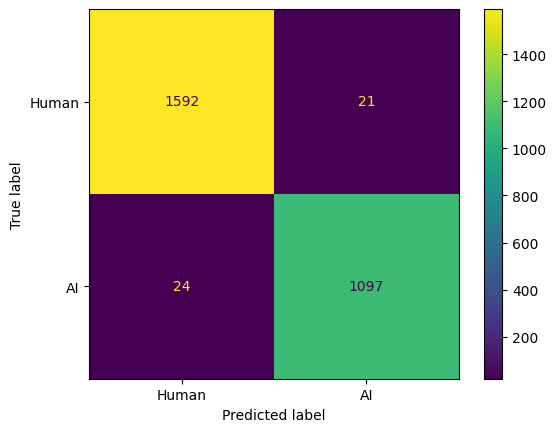

In [ ]:
#instantiate the algorithm
svm_model = SVC(kernel='linear', random_state=42, probability=True)


#svm model performance on the bow vectors
svm_bow = train_and_evaluate(svm_model, x_train_b, y_train_b, x_val_b, y_val_b)


- A training Accuracy of 100% was obtained indicating overfiting. However a high performance on the validation set indicates that the model might be generalizing well.

- 98% of the emails predicted to be generated by AI were correct. Similarly only 98% of the AI generated emails were correctly identified by the model.

<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


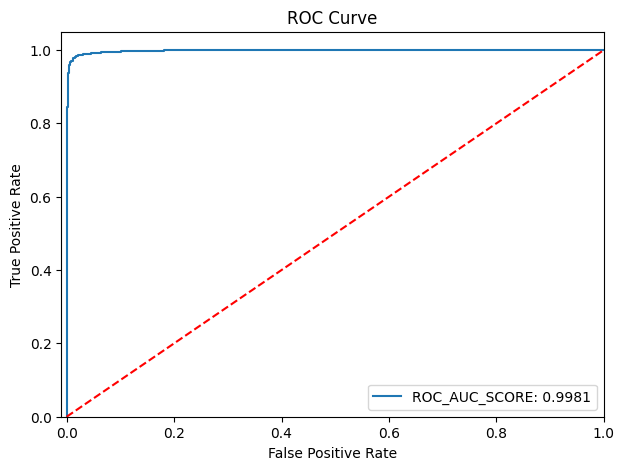

0.9981384524600245

In [ ]:
roc_auc_disp(svm_bow, x_val_b, y_val_b)

- The AUC score is 0.998, indicating that the model is performing well at distinguishing between both classes in the dataset across different thresholds.

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1612
           1       0.97      0.98      0.98      1122

    accuracy                           0.98      2734
   macro avg       0.98      0.98      0.98      2734
weighted avg       0.98      0.98      0.98      2734



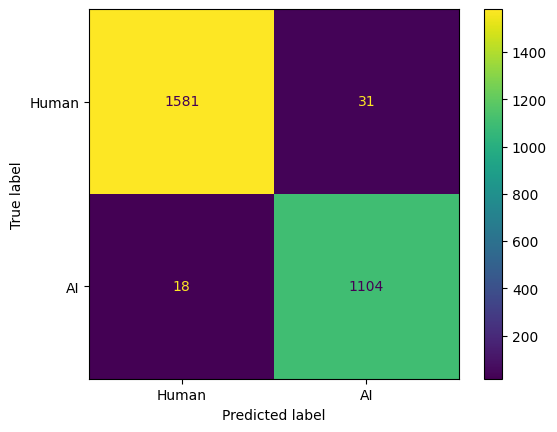

In [ ]:
performance = perf_evaluator(svm_model,  x_test_b, y_test_b)

- A similar performance is obtained on the test set, indicating generalization.

## SVM on TF-IDF features

train accuracy : 0.992
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1613
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      2734
   macro avg       0.99      0.98      0.98      2734
weighted avg       0.99      0.99      0.98      2734



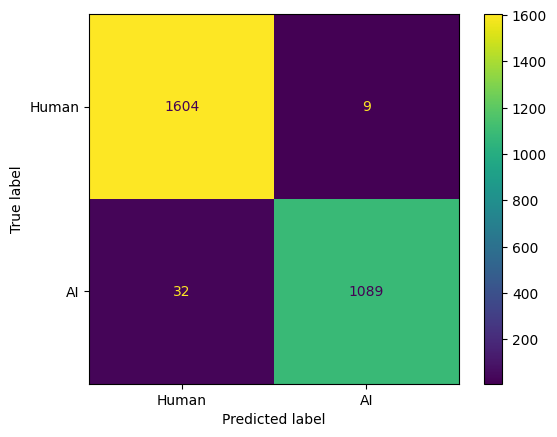

In [ ]:
#instantiate the algorithm
svm_model = SVC(kernel='linear', random_state=42, probability=True)

#svm model performance on the bow vectors
svm_idf = train_and_evaluate(svm_model, x_train_idf, y_train_idf, x_val_idf, y_val_idf)

- A training Accuracy of 99.2% was obtained indicating overfiting. However a high performance on the validation set indicates that the model might be generalizing well.

- In this case however, 99% of the emails predicted to be generated by AI were correct and only 97% of the AI generated emails were correctly identified by the model.

- Only 9 Human generated essay in the validation set were wrongly classified as AI geenrated content.

<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


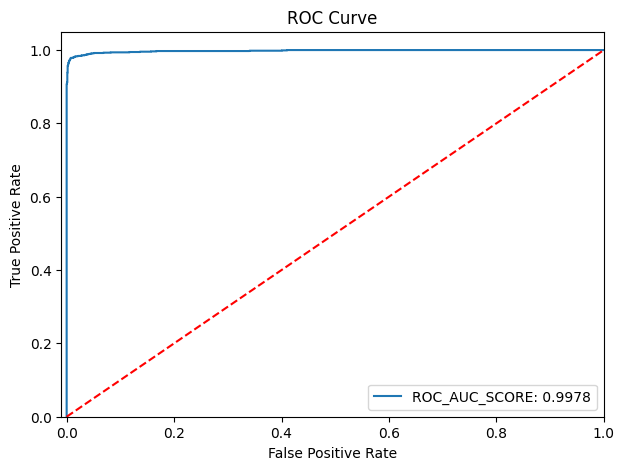

0.9977654239942749

In [ ]:
roc_auc_disp(svm_idf, x_val_idf, y_val_idf)

- The AUC score is 0.998, indicating that the model is performing well at distinguishing between both classes in the dataset across different thresholds.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1612
           1       0.99      0.98      0.99      1122

    accuracy                           0.99      2734
   macro avg       0.99      0.99      0.99      2734
weighted avg       0.99      0.99      0.99      2734



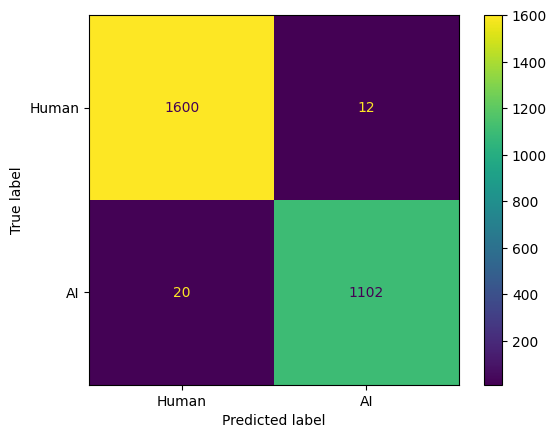

In [ ]:
performance = perf_evaluator(svm_idf,  x_test_idf, y_test_idf)

- A similar performance on the test set indicates that the model is generalizing well

## SVM on CBOW features

train accuracy : 0.981
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1612
           1       0.98      0.97      0.98      1122

    accuracy                           0.98      2734
   macro avg       0.98      0.98      0.98      2734
weighted avg       0.98      0.98      0.98      2734



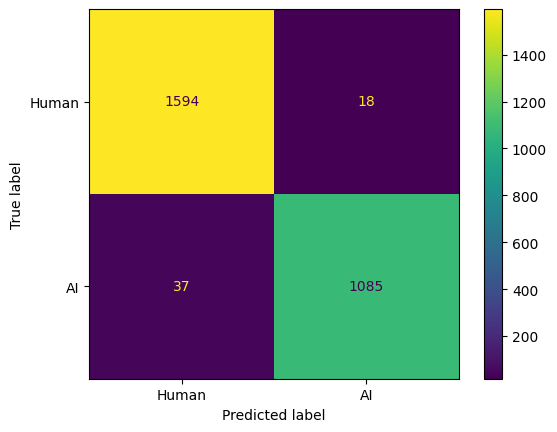

In [ ]:
#instantiate the algorithm
svm_model = SVC(kernel='linear', random_state=42, probability=True)

#svm model performance on the bow vectors
svm_cb = train_and_evaluate(svm_model, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)


- A similar high performance is oobtained used dense vectors

<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


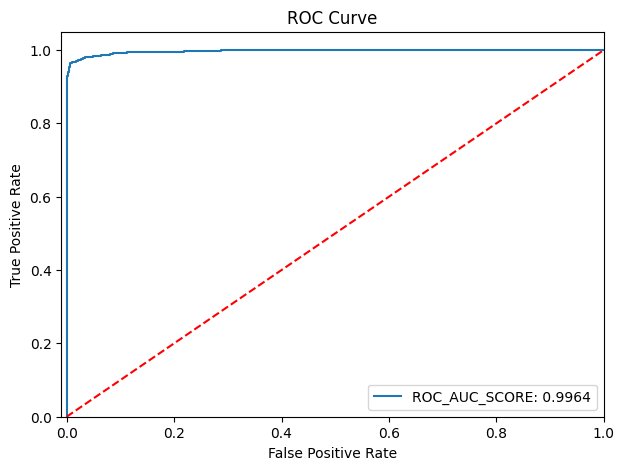

0.9964388078714455

In [ ]:
roc_auc_disp(svm_cb, x_val_cbow, y_val_cbow)

## SVM on SkipGram features

train accuracy : 0.984
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1612
           1       0.99      0.97      0.98      1122

    accuracy                           0.99      2734
   macro avg       0.99      0.98      0.98      2734
weighted avg       0.99      0.99      0.98      2734



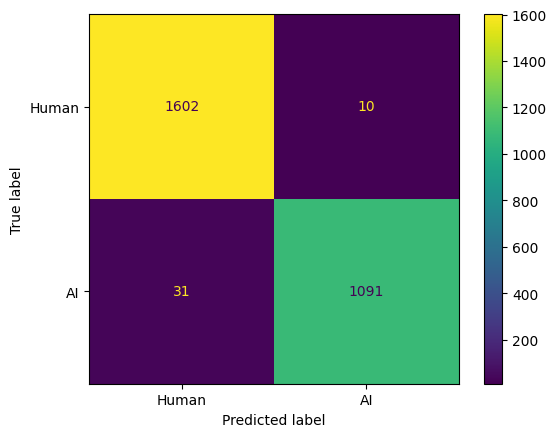

In [ ]:
#instantiate the algorithm
svm_model = SVC(kernel='linear', random_state=42, probability=True)

#svm model performance on the bow vectors
svm_sg = train_and_evaluate(svm_model, x_train_sg, y_train_sg, x_val_sg, y_val_sg)


- A training Accuracy of 98.4% was obtained. However a high performance on the validation set indicates that the model might be generalizing well.

- In this case however, 99% of the emails predicted to be generated by AI were correct and only 97% of the AI generated emails were correctly identified by the model.



<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


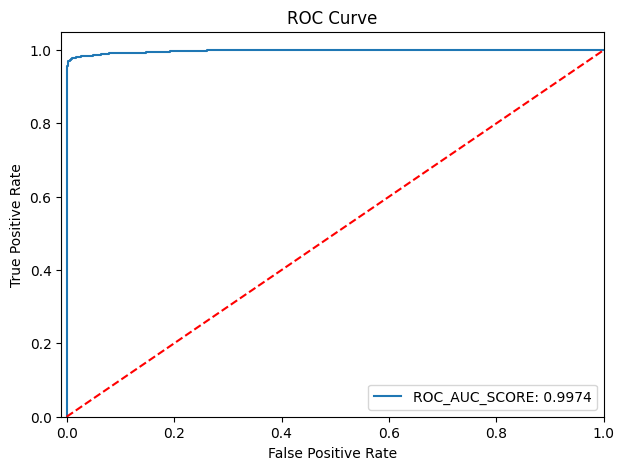

0.9974074786693382

In [ ]:
roc_auc_disp(svm_sg, x_val_sg, y_val_sg)

- The AUC score is 0.997, indicating that the model is performing well at distinguishing between both classes in the dataset across different thresholds.

# Decision Tree

## Decision Tree Model using the BOW features

train accuracy : 0.883
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1613
           1       0.85      0.86      0.85      1121

    accuracy                           0.88      2734
   macro avg       0.87      0.87      0.87      2734
weighted avg       0.88      0.88      0.88      2734



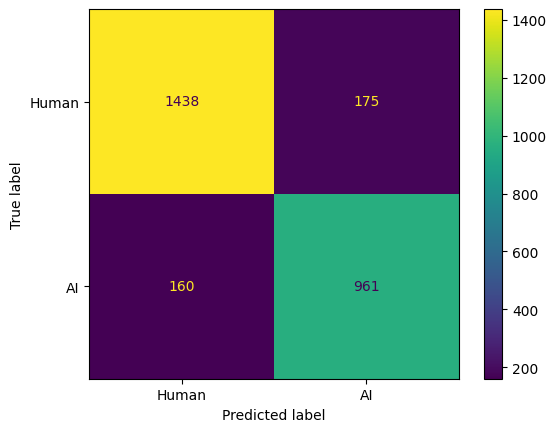

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
d_tree_bow = train_and_evaluate(d_tree, x_train_b, y_train_b, x_val_b, y_val_b)

- A training Accuracy of 88.3% was obtained.

- In this case however, 85% of the emails predicted to be generated by AI were correct and only 86% of the AI generated emails in the dataset were correctly identified by the model.



<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


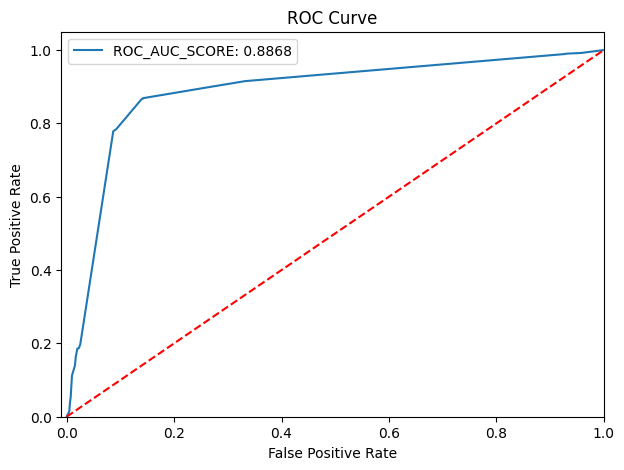

0.8867721727954128

In [ ]:
roc_auc_disp(d_tree_bow, x_val_b, y_val_b)

- A lower AUC score was obtained using the decision tree algorithm. Based on our metrics, the Support Vector Machine model performed better

## Decision Tree Model using the tf-idf features



train accuracy : 0.879
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1613
           1       0.81      0.87      0.84      1121

    accuracy                           0.87      2734
   macro avg       0.86      0.87      0.86      2734
weighted avg       0.87      0.87      0.87      2734



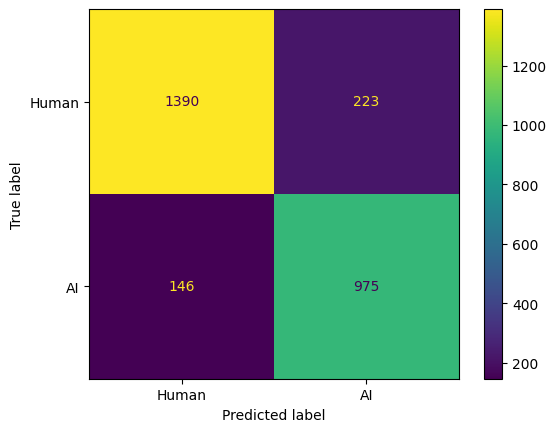

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
d_tree_idf = train_and_evaluate(d_tree, x_train_idf, y_train_idf, x_val_idf, y_val_idf)

- A training Accuracy of 87.9% was obtained.

- In this case however, 81% of the emails predicted to be generated by AI were correct and only 87% of the AI generated emails in the dataset were correctly identified by the model.



<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


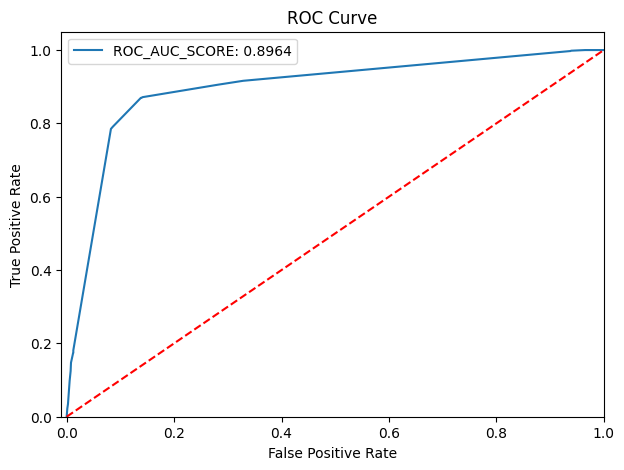

0.8963976345183786

In [ ]:
roc_auc_disp(d_tree_idf, x_val_idf, y_val_idf)

- A lower AUC score was obtained using the decision tree algorithm. Based on our metrics, the Support Vector Machine model performed better

## Decision Tree Model using the CBOW features

train accuracy : 0.964
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1612
           1       0.97      0.93      0.95      1122

    accuracy                           0.96      2734
   macro avg       0.96      0.95      0.96      2734
weighted avg       0.96      0.96      0.96      2734



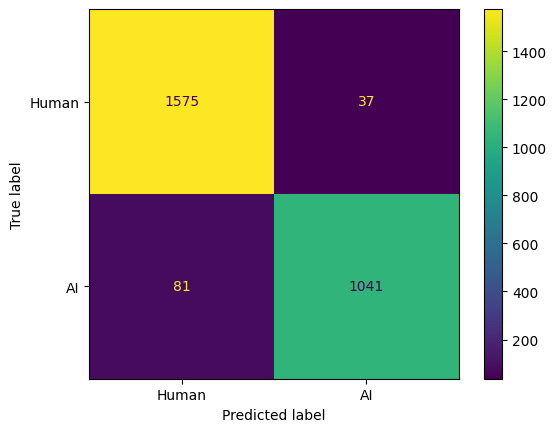

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
d_tree_bow = train_and_evaluate(d_tree, x_train_cbow, y_train_cbow, x_val_cbow, y_val_cbow)

- A training Accuracy of 96.4% was obtained.

- In this case however, 97% of the emails predicted to be generated by AI were correct and only 93% of the AI generated emails in the dataset were correctly identified by the model.



<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


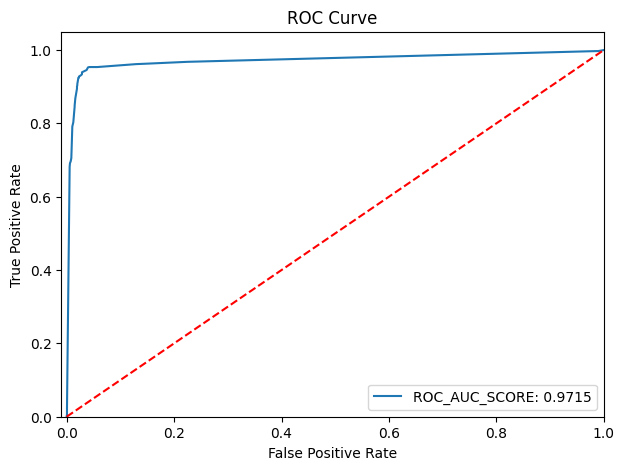

0.9715148861258918

In [ ]:
roc_auc_disp(d_tree_bow, x_val_cbow, y_val_cbow)

- A higher ROC-AUC score was obtained when the decision tree algorithm was fitted on the dense features

## Decision Tree Model using the Skipgram features

train accuracy : 0.962
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1612
           1       0.95      0.93      0.94      1122

    accuracy                           0.95      2734
   macro avg       0.95      0.95      0.95      2734
weighted avg       0.95      0.95      0.95      2734



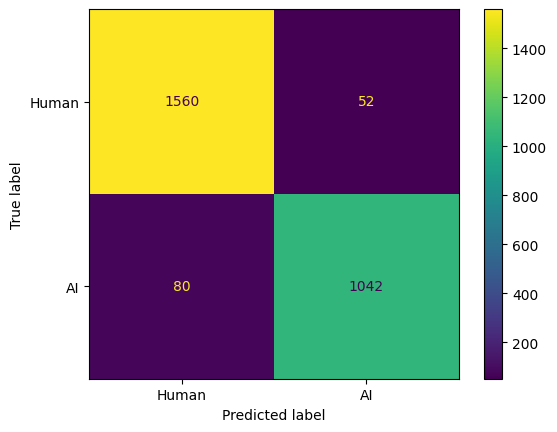

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6)

#decision tree model performance on the bow vectors
d_tree_sg = train_and_evaluate(d_tree, x_train_sg, y_train_sg, x_val_sg, y_val_sg)

- A training Accuracy of 96.2% was obtained.

- In this case however, 95% of the emails predicted to be generated by AI were correct and only 93% of the AI generated emails in the dataset were correctly identified by the model.



<ipython-input-44-c6cccf2d830c>:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.01, 1,1)


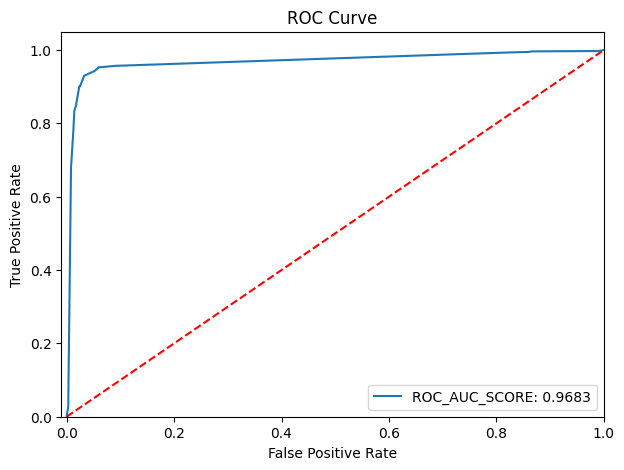

0.9683321501395503

In [ ]:
roc_auc_disp(d_tree_sg, x_val_sg, y_val_sg)

- A higher ROC-AUC score was obtained when the decision tree algorithm was fitted on the dense features

# Cross Validation
- This is done to evaluate the performance of the SVC model on different samples of the data.
- The best performance of the model was obtained using the TF-IDF feature.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#define features for TF-IDF
X = tf_vecs
#define target
y = df['generated']


In [ ]:
#instantiate the algorithm
svm_model = SVC(kernel='linear', random_state=42, probability=True)

scores = cross_val_score(svm_model, X=X, y=y, scoring='recall', cv=5, n_jobs=-1)

print('Mean recall score from cross validation is: ', np.mean(scores))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean recall score from cross validation is:  0.8330592383672556


In [ ]:
scores

array([0.33199643, 0.90864528, 0.97681676, 0.95006687, 0.99777084])

- We procedd to implement hyper parameter tuning on the svm model using the Skip gram features because of it's superior performance to the decision tree models.

# Hyper-parameter Tuning of SVM model

In [ ]:
#import gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#instantiate the classifier
svm = SVC()
#define parameter scope
params = {'C' : [0.75, 1, 1.5],
         'kernel': ['rbf', 'sigmoid'],
         'class_weight': [None, 'balanced']}
#instantiate the gridsearch
grid_search = GridSearchCV(svm, params, scoring='recall', cv=2, n_jobs=-1)

#define features and target
X = sk_embedding
y = df['generated']

#fit the gridsearch algorithm
gs_model = grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
best_params = gs_model.best_params_
best_params

{'C': 0.75, 'class_weight': 'balanced', 'kernel': 'sigmoid'}

In [ ]:
gs_model.best_score_

0.9251152716148823

train accuracy : 0.957
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1612
           1       0.97      0.94      0.96      1122

    accuracy                           0.96      2734
   macro avg       0.96      0.96      0.96      2734
weighted avg       0.96      0.96      0.96      2734



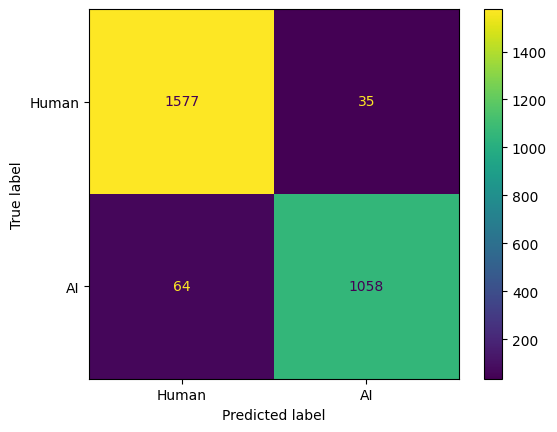

In [ ]:
#instantiate the algorithm with the best set of hyper-parameters
svm = SVC(**best_params)

svm_model = train_and_evaluate(svm, x_train_sg, y_train_sg, x_val_sg, y_val_sg)

- The best set of hyperparameter failed to deliver a better result than previously seen.
- The recall score was 94% which means that only 94%of the AI generated essays in the dataset were rightly classified as such.

# Sequential Neural Networks

## Recurrent Neural Network

In [ ]:
#initialize the tokenizer with top 3000 words
tokenizer = Tokenizer(num_words=3000)

#fit on data to update vocabulary
tokenizer.fit_on_texts(data['text'].values)

#convert text to sequence of integers
X_vecs = tokenizer.texts_to_sequences(data['text'].values)



In [ ]:
# To know the distribution of the length of texts in the essays
essay_length = []
#for each of the essays
for i in range(len(data['text'].values)):
  #append the length of each string to the list
  essay_length.append(len(data['text'][i].split()))


#convert the list to a series
length_frame = pd.Series(essay_length)
#give a descriptive stats of it
print(length_frame.describe(percentiles=[0.1,0.75,0.95,0.99]))

count    27339.000000
mean       194.126559
std         87.263072
min          3.000000
10%         93.000000
50%        188.000000
75%        237.000000
95%        357.000000
99%        461.620000
max        883.000000
dtype: float64


- This shows that the shortes essay was 3 words long. We will look at that shortly.
- The longest however, is 883 words long. But 99% of the essays are not longer than 462. Therefore, I will pad the sequences to 500. Words above 500 will be truncated while those below will be padded to uniform length of 500

In [ ]:
for ind, val in df.iterrows():
  # print(x,'\n\n',y)
  if len(val['text'].split()) < 20:
    print(ind, '\n\n', val)

2380 

 text         code email address phone number
generated                                  1
Name: 2380, dtype: object
2381 

 text         email phone number
generated                     1
Name: 2381, dtype: object
2384 

 text         email phone number
generated                     1
Name: 2384, dtype: object
2387 

 text         email address phone number
generated                             1
Name: 2387, dtype: object
20827 

 text         think education life long process education something young something forever want learn something learn sure write examples essays written
generated                                                                                                                                              1
Name: 20827, dtype: object
20837 

 text         people think education period school others say whole period life write anything think important matter write long something say
generated                                                                

In [ ]:
#to ensure consistency in length
X = pad_sequences(X_vecs, maxlen=500)
y = data['generated']

In [ ]:
#split the data
x_train, x_Ve, y_train, y_Ve = train_test_split(X, y, random_state=10,stratify=y,
                                                   test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_Ve, y_Ve, random_state=10,stratify=y_Ve,
                                                   test_size=0.5)


In [ ]:
#categorize the label
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)
y_val_c = to_categorical(y_val)

In [ ]:
import tensorflow as tf
#define metrics
indices = [

       tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
       tf.keras.metrics.Precision(name='precision'),
       tf.keras.metrics.Recall(name='recall'),
       tf.keras.metrics.AUC(name='auc')
]

# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#define modelcheckpoint to save best model
path = '/checkpoint'

# define early stopping layer
es = EarlyStopping(monitor='val_recall', mode='max', verbose=2, patience=5)

#define modelcheckpoint to save best model
rnn_mc = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_recall', mode='max')


In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
def model_rnn(embedding_dims=100, hidden_dims=32):
    model = Sequential()

    #obtain dense vectors of 100D
    model.add(Embedding(3000, output_dim=embedding_dims,input_length=x_train.shape[1]))
    #apply dropout
    model.add(SpatialDropout1D(0.2))
    #add a vanilla rnn for recurrent operation
    model.add(SimpleRNN(units=hidden_dims))
    #add a dense layer for further representation
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=16, activation='relu'))
    #add a dense layer for classification
    model.add(Dense(y_train.nunique(), activation ='sigmoid'))

    #compile the network
    model.compile(optimizer='adam', metrics=indices, loss='binary_crossentropy')

    return model

In [ ]:
rnn = model_rnn()

rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          300000    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 100)          0         
 Dropout1D)                                                      
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                        

In [ ]:
#train the network
history = rnn.fit(x_train, y_train_c, batch_size=64,
        validation_split=0.2, epochs=30, callbacks=[es, rnn_mc])

Epoch 1/30
274/274 [==============================] - 57s 197ms/step - loss: 0.3548 - accuracy: 0.8248 - precision: 0.8398 - recall: 0.7940 - auc: 0.9208 - val_loss: 0.0806 - val_accuracy: 0.9778 - val_precision: 0.9778 - val_recall: 0.9781 - val_auc: 0.9929
Epoch 2/30
274/274 [==============================] - 52s 190ms/step - loss: 0.1050 - accuracy: 0.9670 - precision: 0.9665 - recall: 0.9676 - auc: 0.9905 - val_loss: 0.0587 - val_accuracy: 0.9838 - val_precision: 0.9836 - val_recall: 0.9842 - val_auc: 0.9963
Epoch 3/30
274/274 [==============================] - 50s 182ms/step - loss: 0.0518 - accuracy: 0.9871 - precision: 0.9870 - recall: 0.9872 - auc: 0.9959 - val_loss: 0.0531 - val_accuracy: 0.9872 - val_precision: 0.9872 - val_recall: 0.9872 - val_auc: 0.9961
Epoch 4/30
274/274 [==============================] - 49s 180ms/step - loss: 0.0320 - accuracy: 0.9918 - precision: 0.9917 - recall: 0.9918 - auc: 0.9983 - val_loss: 0.0367 - val_accuracy: 0.9904 - val_precision: 0.9904 - v

- The model seemed not to be improving after the 6th epoch.

In [ ]:
list(history.history.keys())

['loss',
 'accuracy',
 'precision',
 'recall',
 'auc',
 'val_loss',
 'val_accuracy',
 'val_precision',
 'val_recall',
 'val_auc']

In [ ]:
def result_summarizer(history):
  """
  returns a dataframe that summarized the performance of the
  neural netwotk based on mean value of specified metrics across all epochs
  """
  #instantiate a dictionary with the keys
  new_dict = dict.fromkeys(history.history.keys(),)
  #get the average of each metrics
  for i in history.history.keys():
    new_dict[i] = np.mean(history.history[i])
  #create a dataframe wuth the result
  perf_df = pd.DataFrame(new_dict, index=[0])

  return perf_df

In [ ]:
perf_df_rnn = result_summarizer(history)
perf_df_rnn

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0.068409,0.972337,0.973916,0.969041,0.989135,0.058132,0.986108,0.985985,0.986235,0.995385


- This shows that the avergae val_recall and val_AUC scores across all epochs were 0.986 and 0.995.

In [ ]:
#check the performance on the validation set
#get the predicted category
pred = np.argmax(rnn.predict(x_val), axis=1)

86/86 [==============================] - 2s 25ms/step


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1613
           1       0.98      0.98      0.98      1121

    accuracy                           0.98      2734
   macro avg       0.98      0.98      0.98      2734
weighted avg       0.98      0.98      0.98      2734



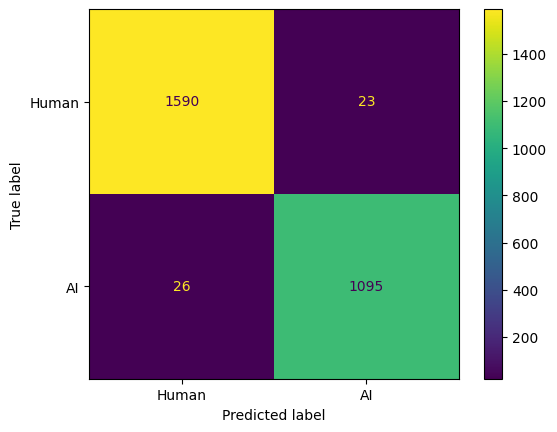

In [ ]:
print(classification_report(y_val, pred))

#obtain a confusion matrix
conf = confusion_matrix(y_val, pred)
confds = ConfusionMatrixDisplay(conf, display_labels=['Human', 'AI'])
confds.plot()

- A similar performance was obtained upon evaluating the model on validation set indicating that the model is gemeralizing properly.

In [ ]:
rnn.evaluate(x_test, y_test_c)

86/86 [==============================] - 3s 36ms/step - loss: 0.0803 - accuracy: 0.9759 - precision: 0.9762 - recall: 0.9755 - auc: 0.9942


[0.08033411204814911,
 0.975859522819519,
 0.9762079119682312,
 0.9754937887191772,
 0.9941649436950684]

In [ ]:
def view_performance(history):
  """
  plots the accuracy and val_accuracy scores against all epochs
  """
  #define accuracy
  acc = history.history['accuracy']

  #define validation_accuracy
  val_acc = history.history['val_accuracy']

  #specify epochs
  epochs = range(1, len(acc) + 1)

  plt.figure(figsize= (5,5)) #set figure size
  plt.plot(epochs, acc, label="Train Accuracy") #plot accuracy against epochs
  plt.plot(epochs, val_acc, label="validation Accuracy") #plot val_acc against epcohs
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy Score")

  plt.legend(loc='best') #display the legends at the best location in the chart

  plt.show()#show the plot

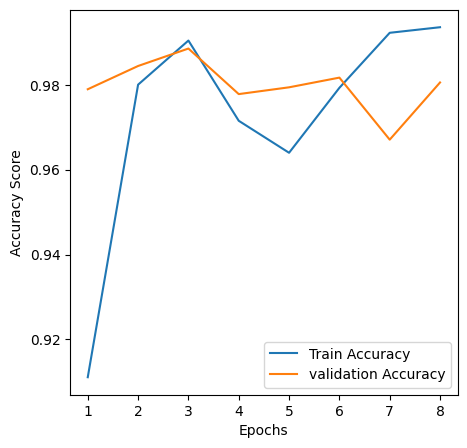

In [ ]:
view_performance(history)

- However, The training accuracy of the model was about 0.99.

## GRU

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# from tensorflow.keras.layers import SpatialDropout2D
def gru(embedding_dims=100, hidden_dims=32):
  """
  returns a compiled GRU architecture
  embedding_dims : the desired shape of embeddings  100
  hidden_dims: number of neurons
  """
  #define structure to be a linear stack of layers
  model = Sequential()

  #add an ebedding layer to obtain dense representation of text sequence
  model.add(Embedding(3000, output_dim=embedding_dims,input_length= x_train.shape[1]))

  #add a spatial dropout layer to combat overfiting
  model.add(SpatialDropout1D(0.2))

  #add an GRU layer
  model.add(GRU(units=hidden_dims))

  #add a dense layer for further representation
  model.add(Dense(units=32, activation='relu'))

  #add a dense layer for further representation
  model.add(Dense(units=16, activation='relu'))
  model.add(Dropout(0.2))
  #add a dense
  model.add(Dense(y_train.nunique(), activation ='sigmoid'))

  model.compile(optimizer='adam', metrics=indices, loss='binary_crossentropy')

  return model

In [ ]:
# define early stopping layer
es = EarlyStopping(monitor='val_recall', mode='max', verbose=2, patience=3)

# #define modelcheckpoint to save best model
path = '/gru_models'
gru_mc = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_recall', mode='max')


In [ ]:
gru_1 = gru()

gru_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          300000    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 100)          0         
 Dropout1D)                                                      
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                        

In [ ]:
#train the network
gru_history = gru_1.fit(x_train, y_train_c, batch_size=32,
        validation_split=0.2, epochs=15, callbacks=[es, gru_mc])

Epoch 1/15
547/547 [==============================] - 151s 259ms/step - loss: 0.1881 - accuracy: 0.9327 - precision: 0.9315 - recall: 0.9270 - auc: 0.9788 - val_loss: 0.0531 - val_accuracy: 0.9840 - val_precision: 0.9840 - val_recall: 0.9840 - val_auc: 0.9970
Epoch 2/15
547/547 [==============================] - 139s 253ms/step - loss: 0.0499 - accuracy: 0.9899 - precision: 0.9898 - recall: 0.9901 - auc: 0.9963 - val_loss: 0.0558 - val_accuracy: 0.9829 - val_precision: 0.9826 - val_recall: 0.9829 - val_auc: 0.9971
Epoch 3/15
547/547 [==============================] - 139s 254ms/step - loss: 0.0324 - accuracy: 0.9929 - precision: 0.9929 - recall: 0.9930 - auc: 0.9982 - val_loss: 0.0400 - val_accuracy: 0.9863 - val_precision: 0.9863 - val_recall: 0.9865 - val_auc: 0.9980
Epoch 4/15
547/547 [==============================] - 137s 250ms/step - loss: 0.0196 - accuracy: 0.9954 - precision: 0.9953 - recall: 0.9954 - auc: 0.9992 - val_loss: 0.0779 - val_accuracy: 0.9806 - val_precision: 0.9803

In [ ]:
#summarize the result
perf_gru_df = result_summarizer(gru_history)
perf_gru_df

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0.034326,0.990066,0.989891,0.98958,0.997074,0.0601,0.985509,0.985331,0.9856,0.995654


- The Average val-recall and val_auc scores are 0.986 and 0.996 respectively.

In [ ]:
#get the predictions on the validation set
pred = np.argmax(gru_1.predict(x_val), axis=1)

86/86 [==============================] - 6s 63ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1613
           1       0.99      0.98      0.99      1121

    accuracy                           0.99      2734
   macro avg       0.99      0.99      0.99      2734
weighted avg       0.99      0.99      0.99      2734



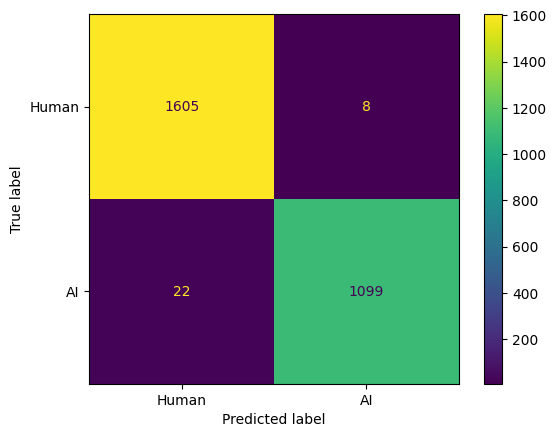

In [ ]:
print(classification_report(y_val, pred))

#obtain a confusion matrix
conf = confusion_matrix(y_val, pred)
confds = ConfusionMatrixDisplay(conf, display_labels=['Human', 'AI'])
confds.plot()

- A training Accuracy of 99% was obtained.

- 99% of the essays the model predicted to be generated by AI was correct. However, only 98% of these essays in the dataset were correctly identified by the model.



In [ ]:
#evaluate model performance on the test set
gru_1.evaluate(x_test, y_test_c)

86/86 [==============================] - 5s 54ms/step - loss: 0.0648 - accuracy: 0.9890 - precision: 0.9890 - recall: 0.9894 - auc: 0.9939


[0.06477929651737213,
 0.9890270829200745,
 0.9890310764312744,
 0.9893928170204163,
 0.9939271211624146]

- A similar performance was obtained on the test set indicating that the model is generalizes well.

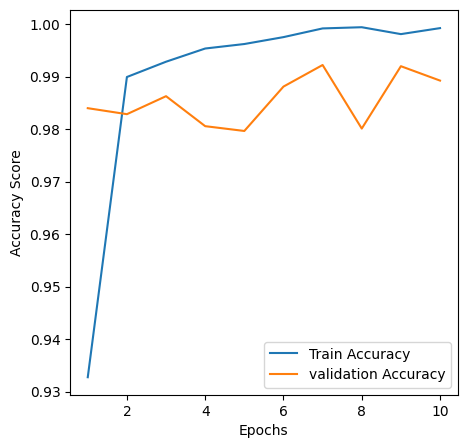

In [ ]:
view_performance(gru_history)

- The validation accuracy was lower than the Training accuracy after the first epoch. However, the disparity was not too large.

## LSTM

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# from tensorflow.keras.layers import SpatialDropout2D
def lstm(embedding_dims=100, hidden_dims=32):
  """
  returns a compiled lstm architecture
  embedding_dims : the desired shape of embeddings  100
  hidden_dims: number of neurons
  """
  #define structure to be a linear stack of layers
  model = Sequential()

  #add an ebedding layer to obtain dense representation of text sequence
  model.add(Embedding(3000, output_dim=embedding_dims,input_length= x_train.shape[1]))

  #add a spatial dropout layer to combat overfiting
  model.add(SpatialDropout1D(0.2))

  #add an GRU layer
  model.add(LSTM(units=hidden_dims))

  #add a dense layer for further representation
  model.add(Dense(units=32, activation='relu'))

  #add a dense layer for further representation
  model.add(Dense(units=16, activation='relu'))
  model.add(Dropout(0.2))
  #add a dense
  model.add(Dense(y_train.nunique(), activation ='sigmoid'))

  model.compile(optimizer='adam', metrics=indices, loss='binary_crossentropy')

  return model

In [ ]:
# define early stopping
es = EarlyStopping(monitor='val_recall', mode='max', verbose=2, patience=3)

# #define modelcheckpoint to save best model
path = '/lstm_models'
lstm_mc = ModelCheckpoint(filepath = path, save_best_only=True, monitor='val_recall', mode='max')


In [ ]:
lstm_1 = lstm()

lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          300000    
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                        

In [ ]:
#train the network
lstm_history = lstm_1.fit(x_train, y_train_c, batch_size=32,
        validation_split=0.2, epochs=15, callbacks=[es, lstm_mc])

Epoch 1/15
547/547 [==============================] - 175s 313ms/step - loss: 0.1477 - accuracy: 0.9559 - precision: 0.9490 - recall: 0.9595 - auc: 0.9877 - val_loss: 0.0307 - val_accuracy: 0.9893 - val_precision: 0.9895 - val_recall: 0.9893 - val_auc: 0.9986
Epoch 2/15
547/547 [==============================] - 162s 297ms/step - loss: 0.0364 - accuracy: 0.9918 - precision: 0.9918 - recall: 0.9916 - auc: 0.9978 - val_loss: 0.0375 - val_accuracy: 0.9881 - val_precision: 0.9881 - val_recall: 0.9881 - val_auc: 0.9981
Epoch 3/15
547/547 [==============================] - 161s 294ms/step - loss: 0.0201 - accuracy: 0.9958 - precision: 0.9959 - recall: 0.9958 - auc: 0.9990 - val_loss: 0.0366 - val_accuracy: 0.9895 - val_precision: 0.9897 - val_recall: 0.9893 - val_auc: 0.9977
Epoch 4/15
547/547 [==============================] - 164s 301ms/step - loss: 0.0193 - accuracy: 0.9953 - precision: 0.9954 - recall: 0.9951 - auc: 0.9992 - val_loss: 0.0391 - val_accuracy: 0.9899 - val_precision: 0.9902

In [ ]:
#summarize the result
perf_lstm_df = result_summarizer(lstm_history)
perf_lstm_df

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0.024209,0.993686,0.993211,0.993924,0.998417,0.052598,0.988624,0.988711,0.988571,0.996019


- The Average val-recall and val_auc scores are 0.989 and 0.996 respectively.

In [ ]:
#get the predictions on the validation set
pred = np.argmax(lstm_1.predict(x_val), axis=1)

86/86 [==============================] - 6s 66ms/step


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1613
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      2734
   macro avg       0.99      0.98      0.98      2734
weighted avg       0.99      0.99      0.98      2734



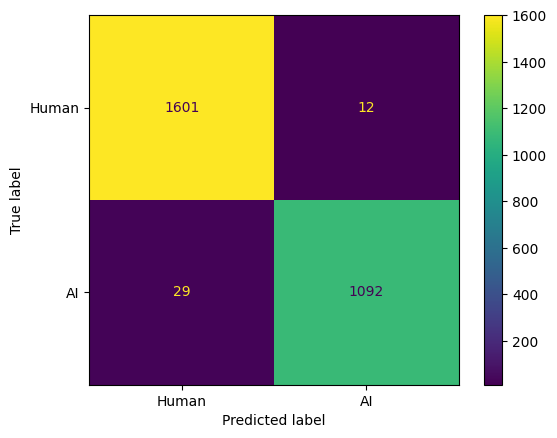

In [ ]:
print(classification_report(y_val, pred))

#obtain a confusion matrix
conf = confusion_matrix(y_val, pred)
confds = ConfusionMatrixDisplay(conf, display_labels=['Human', 'AI'])
confds.plot()

- A training Accuracy of 99% was obtained.

- 99% of the essays the model predicted to be generated by AI was correct. However, only 97% of these essays in the dataset were correctly identified by the model.



In [ ]:
#evaluate model performance on the test set
lstm_1.evaluate(x_test, y_test_c)

86/86 [==============================] - 6s 65ms/step - loss: 0.0453 - accuracy: 0.9912 - precision: 0.9912 - recall: 0.9909 - auc: 0.9965


[0.045335803180933,
 0.9912216663360596,
 0.9912184476852417,
 0.990855872631073,
 0.9964780211448669]

- A higher performance was obtained on the test set indicating that the model is generalizes well.

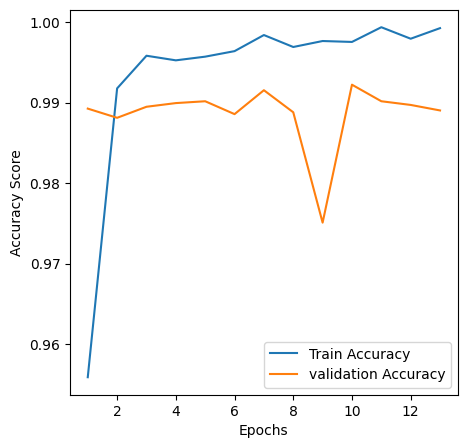

In [ ]:
view_performance(lstm_history)

- The validation accuracy was lower than the Training accuracy after the first epoch.

- Relative to other neural networks explored, the LSTM model performed better because it had higher average recall score and AUC score. Also, it had the best performance on the test set with a recall score of 0.99.

## LSTM Hyper-parameter Tuning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch, Hyperband

## Build the architecture for hyperparameter optimization

In [ ]:
#clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
def hp_model_builder(hp,
    embedding_dims=100, hidden_dims=64):
  """
  returns a compiled lstm architecture
  embedding_dims : the desired shape of embeddings
  hidden_dims: number of neurons
  """
  #define structure to be a linear stack of layers
  model = Sequential()
  # select a choice of output dimension
  out_dim = hp.Choice('output_dim', values=[100, 200])

  #add an ebedding layer to obtain dense representation of text sequence
  model.add(Embedding(3000, output_dim=out_dim, input_length= x_train.shape[1]))

  #select range of neurons
  hidden_dim = hp.Int('units', min_value=32, max_value=64, step=32)
  #add an LSTM layer
  model.add(LSTM(units=hidden_dims))

  hidden_dim2 = hp.Int('units', min_value=32, max_value=64, step=32)

  #add a dense layer for further representation
  model.add(Dense(units=hidden_dim2, activation='relu'))

  #add a dropout layer
  model.add(Dropout(0.3))

  #add a dense layer for further representation
  model.add(Dense(units=hidden_dim2, activation='relu'))
  #add a dense
  model.add(Dense(y_train.nunique(), activation ='sigmoid'))

  model.compile(optimizer='adam', metrics=indices, loss='binary_crossentropy')

  return model

In [ ]:
from kerastuner import Objective
hp_tuner = RandomSearch(hp_model_builder,
                     objective=Objective('val_recall',direction="max"), #optimize for the maximum validation recall
                     max_trials=2,
                     executions_per_trial=2,
                     project_name='essay_classification_project')

In [ ]:
#implemet search
hp_tuner.search(x_train, y_train_c, batch_size=64,
        validation_data=(x_val, y_val_c), epochs=2, callbacks=[es])

Trial 2 Complete [00h 24m 28s]
val_recall: 0.9890270531177521

Best val_recall So Far: 0.9890270531177521
Total elapsed time: 00h 46m 49s


In [ ]:
best_params = hp_tuner.get_best_hyperparameters()[0]


In [ ]:
best_params

## Rebuild the network with best hyper-parameters

In [ ]:
hp_lstm = hp_tuner.hypermodel.build(best_params) #build model using best parameters
hp_lstm.summary() #print summary of architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          600000    
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 676290 (2.58 MB)
Trainable params: 676290 

In [ ]:
history_tuned = hp_lstm.fit(x_train, y_train_c, batch_size=64,
        validation_split=0.2, epochs=15, callbacks=[es])

Epoch 1/15
274/274 [==============================] - 247s 891ms/step - loss: 0.1653 - accuracy: 0.9443 - precision: 0.9415 - recall: 0.9463 - auc: 0.9851 - val_loss: 0.0517 - val_accuracy: 0.9858 - val_precision: 0.9858 - val_recall: 0.9858 - val_auc: 0.9963
Epoch 2/15
274/274 [==============================] - 240s 876ms/step - loss: 0.0533 - accuracy: 0.9865 - precision: 0.9866 - recall: 0.9865 - auc: 0.9958 - val_loss: 0.0638 - val_accuracy: 0.9849 - val_precision: 0.9849 - val_recall: 0.9847 - val_auc: 0.9952
Epoch 3/15
274/274 [==============================] - 239s 874ms/step - loss: 0.0353 - accuracy: 0.9913 - precision: 0.9913 - recall: 0.9912 - auc: 0.9978 - val_loss: 0.0402 - val_accuracy: 0.9888 - val_precision: 0.9890 - val_recall: 0.9886 - val_auc: 0.9972
Epoch 4/15
274/274 [==============================] - 240s 876ms/step - loss: 0.0149 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9962 - auc: 0.9992 - val_loss: 0.0421 - val_accuracy: 0.9893 - val_precision: 0.9893

In [ ]:
#summarize the result
perf_lstm_df = result_summarizer(history_tuned)
perf_lstm_df

,loss,accuracy,precision,recall,auc,val_loss,val_accuracy,val_precision,val_recall,val_auc
0,0.047857,0.985616,0.985221,0.985857,0.9964,0.055041,0.985306,0.985338,0.985241,0.996003


- The tuned LSTM model had a val_recall and val_AUC score of 0.985 and 0.996 respectively.

In [ ]:
#get the predictions on the validation set using the hyper Model
pred = np.argmax(hp_lstm.predict(x_val), axis=1)

86/86 [==============================] - 16s 183ms/step


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1613
           1       1.00      0.96      0.98      1121

    accuracy                           0.98      2734
   macro avg       0.99      0.98      0.98      2734
weighted avg       0.98      0.98      0.98      2734



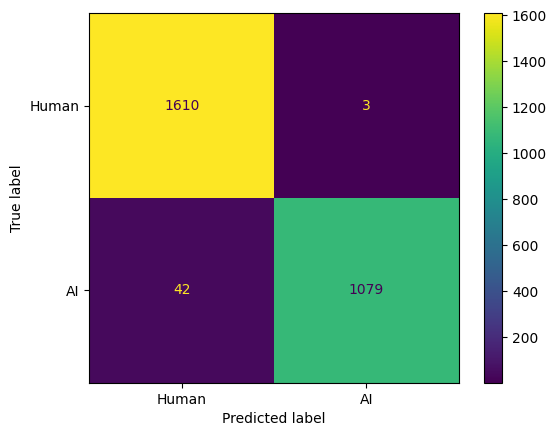

In [ ]:
print(classification_report(y_val, pred))

#obtain a confusion matrix
conf = confusion_matrix(y_val, pred)
confds = ConfusionMatrixDisplay(conf, display_labels=['Human', 'AI'])
confds.plot()

- The optimized LSTM model had a 100% recall for the zero class. It only misclassified 3 AI generated essays as Human written essays.

- However, it misclassified 42 human written essays as AI generated essay with a recall score of 0.96.


In [ ]:
hp_lstm.evaluate(x_test, y_test_c)

86/86 [==============================] - 24s 275ms/step - loss: 0.0487 - accuracy: 0.9879 - precision: 0.9879 - recall: 0.9879 - auc: 0.9961


[0.04869157075881958,
 0.9879297614097595,
 0.9879297614097595,
 0.9879297614097595,
 0.9960635304450989]

- A similar performance was obtained upon evaluating the tuned model on the test set indicating generalization of the model.

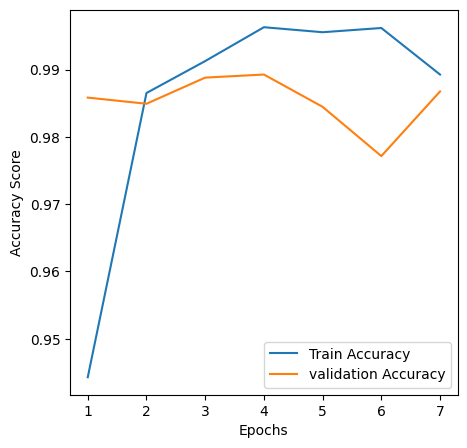

In [ ]:
view_performance(history_tuned)

- The validation accuracy was lower than the train accuracy after the first epoch.
- The highest train and validation accuracy was obtained at the 4th epoch.

# BERT using Simple Transformers

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 

## Read the data

In [ ]:
data = read_file('uncleaned_essay_data.csv')
data.head(1)

,text,generated
0,"Car-free cities have become a subject of increasing interest and debate in recent years, as urban areas around the world grapple with the challenges of congestion, pollution, and limited resources. The concept of a car-free city involves creating urban environments where private automobiles are either significantly restricted or completely banned, with a focus on alternative transportation methods and sustainable urban planning. This essay explores the benefits, challenges, and potential solutions associated with the idea of car-free cities. Benefits of Car-Free Cities Environmental Sustainability: Car-free cities promote environmental sustainability by reducing air pollution and greenhouse gas emissions. Fewer cars on the road mean cleaner air and a significant decrease in the contribution to global warming. Improved Public Health: A reduction in automobile usage can lead to better public health outcomes. Fewer cars on the road result in fewer accidents and a safer urban environment for pedestrians and cyclists. Moreover, less air pollution can lead to reduced respiratory and cardiovascular problems. Efficient Use of Space: Car-free cities utilize urban space more efficiently. Parking lots and wide roads can be repurposed for green spaces, parks, and pedestrian zones, enhancing the overall quality of life in the city. Reduced Traffic Congestion: By eliminating or restricting car usage, traffic congestion is significantly reduced, leading to faster commute times and less frustration for residents and commuters. Cost Savings: Car ownership and maintenance can be expensive. Car-free cities allow residents to save money on vehicles, fuel, and insurance, improving their overall financial well-being. Challenges of Car-Free Cities Resistance to Change: Transitioning to a car-free city can face resistance from citizens, especially those who rely heavily on their cars for daily activities and commutes. Public Transportation Infrastructure: An effective public transportation system is crucial for the success of car-free cities. Cities need to invest in and expand their public transportation networks to ensure that people have viable alternatives to cars. Economic Impact: Businesses that rely on car-dependent customers may experience a decline in revenue in a car-free city. It's essential to address this economic impact and find ways to support affected businesses during the transition. Urban Planning and Infrastructure: The redesign of urban areas for car-free living requires significant planning and investment in infrastructure, which can be a lengthy and complex process. Solutions for Car-Free Cities Expand Public Transportation: Invest in the expansion and improvement of public transportation systems to provide convenient and affordable alternatives to private cars. Promote Active Transportation: Encourage walking and cycling by building bike lanes, pedestrian-friendly streets, and ensuring safe infrastructure for these activities. Implement Carpooling and Ride-Sharing: Promote carpooling and ride-sharing services to reduce the number of private vehicles on the road. Adopt Electric and Sustainable Transportation: Encourage the use of electric vehicles and promote sustainability by using renewable energy sources to power transportation. Education and Public Awareness: Educate citizens about the benefits of a car-free city and involve them in the planning process to increase support and understanding. Conclusion Car-free cities represent a vision for a sustainable and healthier urban future. While the transition to a car-free city is not without challenges, the potential benefits in terms of environmental sustainability, public health, and efficient urban living make it a compelling goal. Through a combination of investment in public transportation, promotion of alternative transportation methods, and public engagement, cities can work towards a future where cars are no longer the dominant mode of transportation. Ca

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from datasets import load_dataset
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.model_selection import train_test_split

## **Data Preparation**

In [ ]:
data.columns

Index(['text', 'generated'], dtype='object')

In [ ]:
# rename the column for consistency
data.rename(columns = {"generated": "labels"}, inplace = True)

# Split the data into train, validation and test sets
X = data["text"]
y = data["labels"]
x_train, x_V, y_train, y_V = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_V, y_V, test_size=0.5, stratify=y_V, random_state=42)

# Concatenate features with targets for each sets
train_set = pd.concat([x_train, y_train], axis=1)
val_set = pd.concat([x_val, y_val], axis=1)
test_set = pd.concat([x_test, y_test], axis=1)

# reset the index for each sets
train_set.reset_index(drop = True, inplace = True)
val_set.reset_index(drop = True, inplace = True)
test_set.reset_index(drop = True, inplace = True)

### **Model Training**

In [ ]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=2)n#train model for 2 epochs

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'bert-base-uncased',
    num_labels=2,
    args=model_args,
    use_cuda = True
)

# Train the model
print("==========================Training a BERT Model=================================")
model.train_model(train_set)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

==========================Training a BERT Model=================================


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/43 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/2734 [00:00<?, ?it/s]

Running Epoch 2 of 2:   0%|          | 0/2734 [00:00<?, ?it/s]

(5468, 0.05435260717744102)

In [ ]:
# Evaluate the model performance
result, model_outputs, wrong_predictions = model.eval_model(val_set)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/5 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.9842454042371879,
 'accuracy': 0.9923189465983906,
 'f1_score': 0.9907120743034056,
 'tp': 1120,
 'tn': 1593,
 'fp': 19,
 'fn': 2,
 'auroc': 0.9999060079705241,
 'auprc': 0.9998716767519032,
 'eval_loss': 0.042598224338429906}

In [ ]:
len(wrong_predictions)

21

In [ ]:
test_set.reset_index(drop = True, inplace = True)

In [ ]:
test_essays = []
for i in range(test_set.shape[0]):
    essay = test_set["text"][i]
    test_essays.append(essay)

In [ ]:
# Make predictions with the model
predictions, raw_outputs = model.predict(test_essays)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# compute classification report
cls_report = classification_report(test_set["labels"],
                                   predictions,
                                   target_names = ["Human", "AI"])

print(f"Classification Report: \n {cls_report}")

Classification Report: 
               precision    recall  f1-score   support

       Human       1.00      0.99      1.00      1612
          AI       0.99      1.00      0.99      1122

    accuracy                           1.00      2734
   macro avg       0.99      1.00      1.00      2734
weighted avg       1.00      1.00      1.00      2734



- This is the best performance thus far.

- The BERT model had a 100% recall score on the test set. This means that the model was able to corectlt classify all the AI Generated essays in the test set. However, 99% of the model's predictions were correct.
- The f1 score was also 99%